In [1]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
import string
import matplotlib.pyplot as plt
import random
from spacy.lang.pt.stop_words import STOP_WORDS

In [2]:
pln = spacy.load('pt_core_news_lg')

In [3]:
df_text_train = pd.read_csv('../Bases de dados/base_treinamento.txt',encoding='utf-8')

In [4]:
df_text_train.shape

(196, 2)

In [5]:
df_text_train.head(), df_text_train.tail()

(                             texto   emocao
 0        este trabalho é agradável  alegria
 1  gosto de ficar no seu aconchego  alegria
 2       fiz a adesão ao curso hoje  alegria
 3       eu sou admirada por muitos  alegria
 4                  adoro como você  alegria,
                                                  texto emocao
 191  estou chocado e amedrontado com este assassina...   medo
 192  é preciso afugenta com ímpeto este medo do inf...   medo
 193  políticos usam suas forças para afugentar e am...   medo
 194       o objetivo disso e apenas me amedrontar mais   medo
 195                                    isso me apavora   medo)

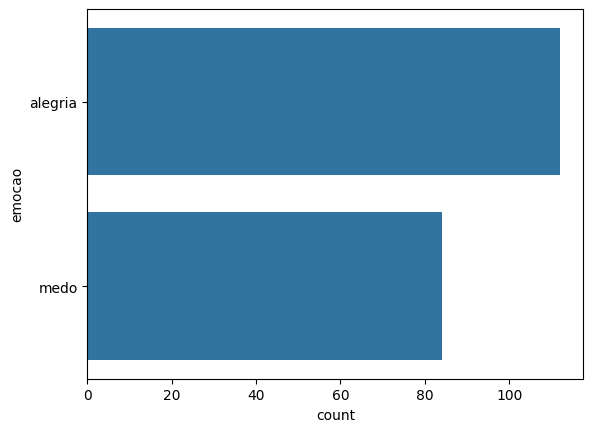

In [6]:
sns.countplot(df_text_train['emocao'], label='Count');

In [7]:
punctation = string.punctuation
punctation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
stop_words = STOP_WORDS

In [9]:
stop_words

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

In [10]:
len(stop_words)

416

In [11]:
pln

In [12]:
def preprocessing(text):
    text = text.lower()
    document = pln(text)
    list_preprocessing =[]
    for token in document:
        list_preprocessing.append(token.lemma_)
        
    list_preprocessing = [word for word  in list_preprocessing if word not in stop_words and word not in punctation]
    list_preprocessing = ' '.join([str(element)for element in list_preprocessing if not element.isdigit()])

    return list_preprocessing

In [13]:
list_result = preprocessing('Estou aprendendo 1 10 23 processamento de linguagem natural, curso em Curitiba')
list_result

'aprender processamento linguagem natural curso curitiba'

In [14]:
df_text_train['texto'] = df_text_train['texto'].apply(preprocessing)

In [15]:
df_text_train

,texto,emocao
0,trabalho agradável,alegria
1,gostar ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirado,alegria
4,adorar,alegria
...,...,...
191,chocado amedrontar assassinato brutal,medo
192,preciso afugentar ímpeto medo de o inferno,medo
193,político força afugentar amedrontar,medo
194,objetivo de isso amedrontar,medo


In [17]:
df_text_train_end = []
for text,emotion in zip(df_text_train['texto'],df_text_train['emocao']):
    if emotion == 'alegria':
        dic = ({"ALEGRIA":True,"MEDO":False})
    else:
        dic = ({"ALEGRIA":False,"MEDO":True})

    df_text_train_end.append([text,dic.copy()])

In [20]:
len(df_text_train_end),df_text_train_end

(196,
 [['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
  ['gostar ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
  ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
  ['admirado', {'ALEGRIA': True, 'MEDO': False}],
  ['adorar', {'ALEGRIA': True, 'MEDO': False}],
  ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
  ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
  ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
  ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
  ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
  ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
  ['amar', {'ALEGRIA': True, 'MEDO': False}],
  ['alívio', {'ALEGRIA': True, 'MEDO': False}],
  ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
  ['achar apaixoneer', {'ALEGRIA': True, 'MEDO': False}],
  ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
  ['sentir animado', {'ALEGRIA': True, 'MEDO': False}],
  ['

In [21]:
type(df_text_train_end[0][1])

dict